# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [66]:
#Import all the necessary modules
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [16]:
## Import the datafile
#os.chdir("C:\Users\admin\Downloads\GreatlakesPython16112018\AIML\Recidency_3\Lab\Internal")
pima_df = pd.read_csv("diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [17]:
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [18]:
pima_df.info()
pima_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [19]:
pima_df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [23]:
print((pima_df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction",
               "Age","Outcome"]] == 0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [22]:
# mark zero values as missing or NaN
pima_df[["Glucose"]] = pima_df[["Glucose"]].replace(0, pima_df['Glucose'].median())
pima_df[["BloodPressure"]] = pima_df[["BloodPressure"]].replace(0, pima_df['BloodPressure'].median())
pima_df[["SkinThickness"]] = pima_df[["SkinThickness"]].replace(0, pima_df['SkinThickness'].median())
pima_df[["Insulin"]] = pima_df[["Insulin"]].replace(0, pima_df['Insulin'].median())

# Q5 Print the descriptive statistics of each & every column using describe() function

In [24]:
pima_df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

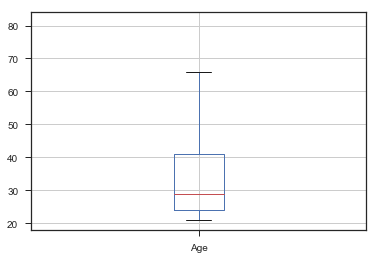

In [60]:
pima_df["Age"].plot.box(grid='True')

In [62]:
pima_df.groupby("Outcome").count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


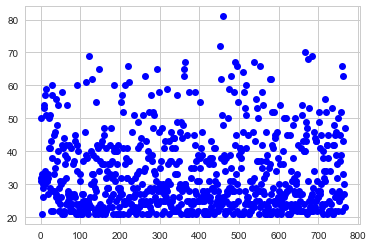

In [69]:
plt.plot(pima_df["Age"], 'o', color='Blue')

In [73]:
ctab = pd.crosstab(pima_df["Pregnancies"],pima_df["Outcome"])
ctab

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


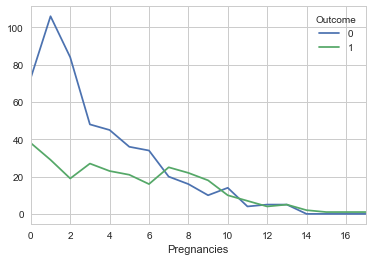

In [77]:
#plt.plot(ctab)
ctab.plot()

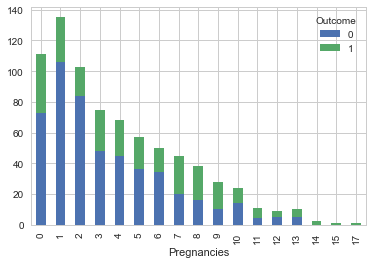

In [81]:
ctab.plot(kind="bar",stacked = True)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [28]:
## Target Variable Frequency Distribution
freq = pima_df['Outcome'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
freq

,Outcome,count,prop
0,0,500,0.651042
1,1,268,0.348958


In [32]:
import statistics as st

In [33]:
#mean
st.mean(pima_df["Age"])

33

In [34]:
#mode
st.mode(pima_df["Age"])

22

In [35]:
#median
st.median(pima_df["Age"])

29.0

In [36]:
#Harmonic Mean
st.harmonic_mean(pima_df["Age"])

29.975602368493412

In [37]:
#Variance
st.variance(pima_df["Age"])

138

In [39]:
#Standard Deviation
st.stdev(pima_df["Age"])

11.74734012447073

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

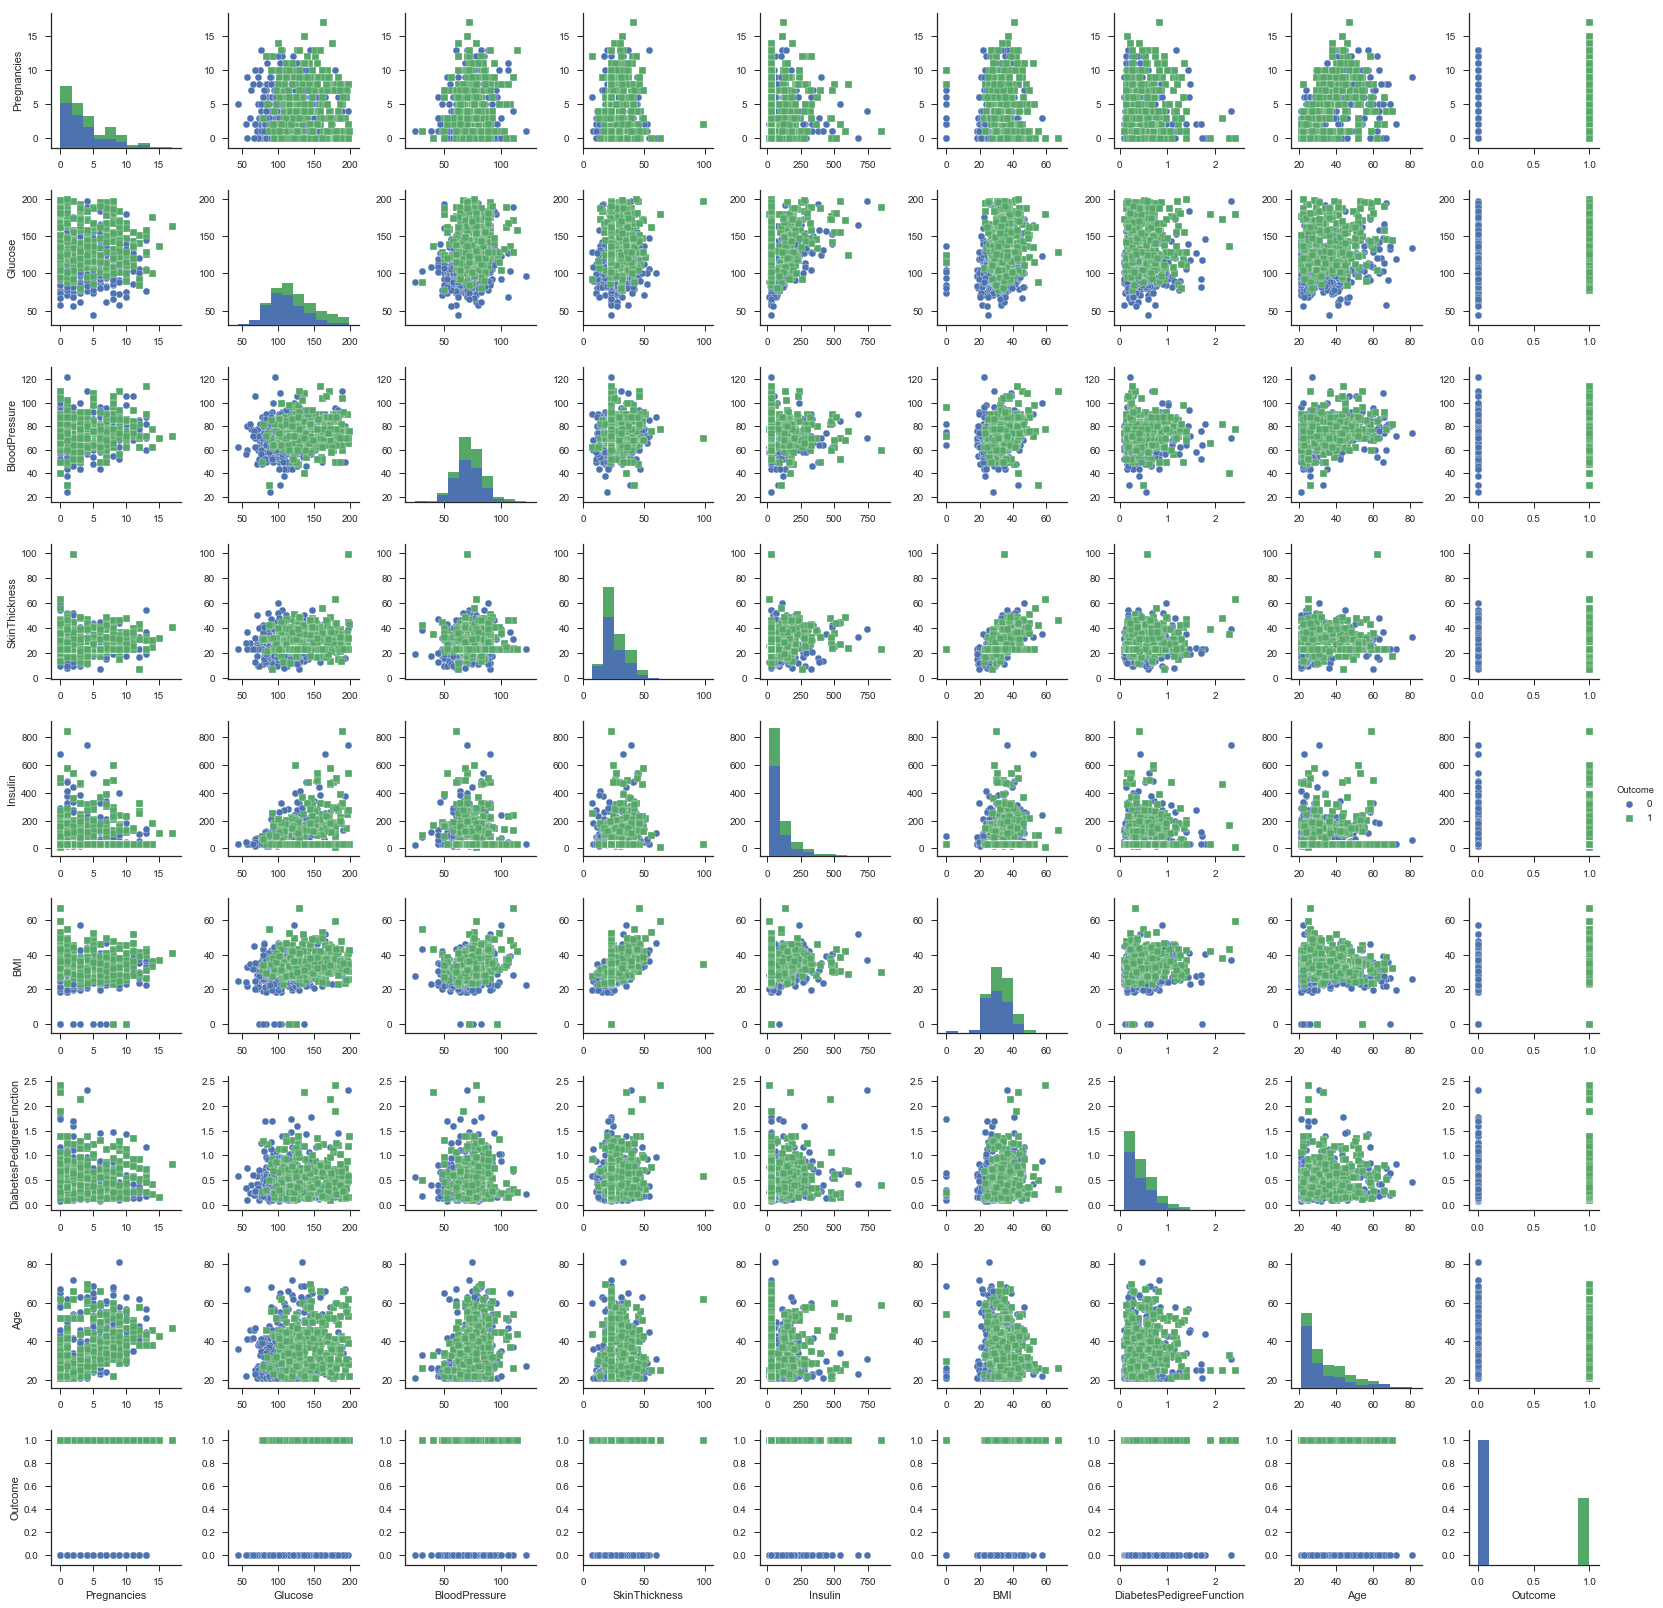

In [40]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(pima_df, hue="Outcome", markers=["o", "s"])

In [86]:
pima_df['Pregnancies'].corr(pima_df['Age'])

0.54434122840233901

In [89]:
#pima_df.plot.box(grid='True')

In [88]:
pima_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.017683,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.235035,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.234336,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.504307,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.197284,0.178029,-0.015413,0.148457
BMI,0.017683,0.235035,0.234336,0.504307,0.197284,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.292695,0.173844,0.238356,1.000000


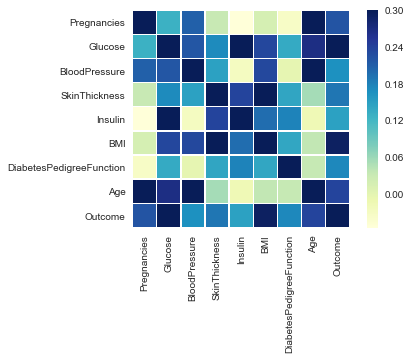

In [90]:
sns.heatmap(pima_df.corr(),cmap="YlGnBu", vmax=.3, square=True,linewidths=.5)

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [92]:
# capture the target column ("default") into separate vectors for training set and test set

X = pima_df.drop("Outcome" , axis=1)

y = pima_df.pop("Outcome")

In [93]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [94]:
print("Train Set =", train_set.shape)
print("Test Set =",test_set.shape)

Train Set = (537, 8)
Test Set = (231, 8)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [97]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer #DT does not take strings as input for the model fit step....
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [98]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [99]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

                               Imp
Pregnancies               0.112401
Glucose                   0.228204
BloodPressure             0.144272
SkinThickness             0.036028
Insulin                   0.009768
BMI                       0.229912
DiabetesPedigreeFunction  0.097277
Age                       0.142139


# Q10 Print the accuracy of the model & print the confusion matrix 

In [100]:
y_predict = dt_model.predict(test_set)

Print the feature importance of the decision model - Optional

In [101]:
print(dt_model.score(train_set , train_labels))
print(dt_model.score(test_set , test_labels))

1.0
0.722943722944


In [102]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[112  34]
 [ 30  55]]


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [103]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(train_set, train_labels)

In [104]:
y_predict = rfcl.predict(test_set)
print(rfcl.score(test_set , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.800865800866
[[132  14]
 [ 32  53]]


In [105]:
metrics.precision_score(test_labels,y_predict)

0.79104477611940294

In [106]:
metrics.recall_score(test_labels,y_predict)

0.62352941176470589

# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [107]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
#abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(train_set, train_labels)


In [108]:
y_predict = abcl.predict(test_set)
print(abcl.score(test_set , test_labels))

print(metrics.confusion_matrix(test_labels, y_predict))

0.727272727273
[[112  34]
 [ 29  56]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [109]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(train_set, train_labels)


In [110]:
y_predict = bgcl.predict(test_set)

print(bgcl.score(test_set , test_labels))

print(metrics.confusion_matrix(test_labels, y_predict))

0.800865800866
[[130  16]
 [ 30  55]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(train_set, train_labels)

In [112]:
y_predict = gbcl.predict(test_set)
print(gbcl.score(test_set , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.818181818182
[[130  16]
 [ 26  59]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [147]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import log_loss
from collections import Counter
eclf = VotingClassifier(estimators=[
    ('rf1', rfcl),('gbc', gbcl), ('adb',abcl)], voting='soft', weights = [1,3,1])

In [148]:
eclf.fit(train_set, train_labels)
y_val_pred = eclf.predict_proba(test_set)
print("log_loss: ",log_loss(test_labels, y_val_pred))
confidence = eclf.score(test_set, test_labels)
print('accuracy:',confidence)
predictions = eclf.predict(test_set)
print('predicted class counts:',Counter(predictions))

log_loss:  0.440403014634
accuracy: 0.792207792208
predicted class counts: Counter({0: 152, 1: 79})
